题目
编写一个简单的全连接神经网络，完成一个二分类任务。输入数据是一个二维特征的随机生成数据集。要求：

定义神经网络结构，包括输入层、隐藏层和输出层。
使用 ReLU 激活函数和 Sigmoid 激活函数。
使用交叉熵损失函数（Cross-Entropy Loss）进行优化。
使用随机梯度下降（SGD）优化器训练模型。
输出每轮训练的损失，并验证模型在训练数据上的准确率。

SimpleNN(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Epoch [10/100], Loss: 0.8242
Epoch [20/100], Loss: 0.7261
Epoch [30/100], Loss: 0.6938
Epoch [40/100], Loss: 0.6817
Epoch [50/100], Loss: 0.6762
Epoch [60/100], Loss: 0.6731
Epoch [70/100], Loss: 0.6708
Epoch [80/100], Loss: 0.6689
Epoch [90/100], Loss: 0.6670
Epoch [100/100], Loss: 0.6652
Training Accuracy: 48.00%


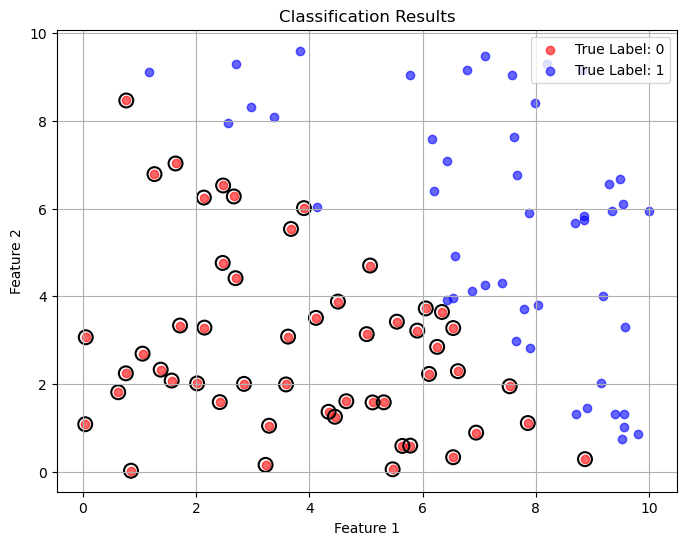

In [4]:
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
import torch.optim as optim

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
# 随机生成数据集
torch.manual_seed(42)
data_size = 100
X = torch.rand((data_size, 2)) * 10  # 2维特征，范围 [0, 10)
y = (X[:, 0] + X[:, 1] > 10).float()  # 如果两数之和大于10，则标记为1，否则为0

# 定义神经网络
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 4)  # 输入层 -> 隐藏层，2 -> 4
        self.relu = nn.ReLU()      # ReLU 激活函数
        self.fc2 = nn.Linear(4, 1) # 隐藏层 -> 输出层，4 -> 1
        self.sigmoid = nn.Sigmoid() # Sigmoid 激活函数

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# 初始化模型、损失函数和优化器
model = SimpleNN()
print(model)
criterion = nn.BCELoss()  # 二分类交叉熵损失
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练模型
epochs = 100
for epoch in range(epochs):
    model.train()
    
    # 前向传播
    outputs = model(X).squeeze()
    loss = criterion(outputs, y)
    
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 打印损失
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# 验证模型
model.eval()
with torch.no_grad():
    predictions = (model(X).squeeze() > 0.5).float()
    accuracy = (predictions == y).sum().item() / data_size
    print(f"Training Accuracy: {accuracy * 100:.2f}%")

# 可视化
X_np = X.numpy()
y_np = y.numpy()
pred_np = predictions.numpy()

# 创建散点图
plt.figure(figsize=(8, 6))
# 真值为 0 的点（红色）
plt.scatter(X_np[y_np == 0][:, 0], X_np[y_np == 0][:, 1], color="red", label="True Label: 0", alpha=0.6)
# 真值为 1 的点（蓝色）
plt.scatter(X_np[y_np == 1][:, 0], X_np[y_np == 1][:, 1], color="blue", label="True Label: 1", alpha=0.6)
# 预测错误的点（黑色框）
for i in range(data_size):
    if y_np[i] != pred_np[i]:
        plt.scatter(X_np[i, 0], X_np[i, 1], edgecolor="black", facecolor="none", s=100, label="Misclassified" if i == 0 else "", linewidth=1.5)

plt.title("Classification Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


题目
编写一个简单的全连接神经网络来拟合一个一维非线性函数 
y=sin(x)。

具体要求：
1.输入数据为在区间 [0,2π] 上随机生成的浮点数。
2.定义一个具有两层隐藏层的全连接神经网络，隐藏层分别包含 10 和 5 个神经元。
3.使用 Tanh 激活函数。
4.训练模型以最小化均方误差（MSE）。
5.在训练结束后，绘制真实曲线和模型预测的比较图。

Epoch [20/1000], Loss: 0.2798
Epoch [40/1000], Loss: 0.1976
Epoch [60/1000], Loss: 0.1588
Epoch [80/1000], Loss: 0.1444
Epoch [100/1000], Loss: 0.1385
Epoch [120/1000], Loss: 0.1340
Epoch [140/1000], Loss: 0.1296
Epoch [160/1000], Loss: 0.1252
Epoch [180/1000], Loss: 0.1208
Epoch [200/1000], Loss: 0.1165
Epoch [220/1000], Loss: 0.1121
Epoch [240/1000], Loss: 0.1077
Epoch [260/1000], Loss: 0.1034
Epoch [280/1000], Loss: 0.0992
Epoch [300/1000], Loss: 0.0950
Epoch [320/1000], Loss: 0.0910
Epoch [340/1000], Loss: 0.0872
Epoch [360/1000], Loss: 0.0835
Epoch [380/1000], Loss: 0.0800
Epoch [400/1000], Loss: 0.0767
Epoch [420/1000], Loss: 0.0736
Epoch [440/1000], Loss: 0.0707
Epoch [460/1000], Loss: 0.0679
Epoch [480/1000], Loss: 0.0653
Epoch [500/1000], Loss: 0.0628
Epoch [520/1000], Loss: 0.0605
Epoch [540/1000], Loss: 0.0582
Epoch [560/1000], Loss: 0.0560
Epoch [580/1000], Loss: 0.0538
Epoch [600/1000], Loss: 0.0517
Epoch [620/1000], Loss: 0.0496
Epoch [640/1000], Loss: 0.0475
Epoch [660/1

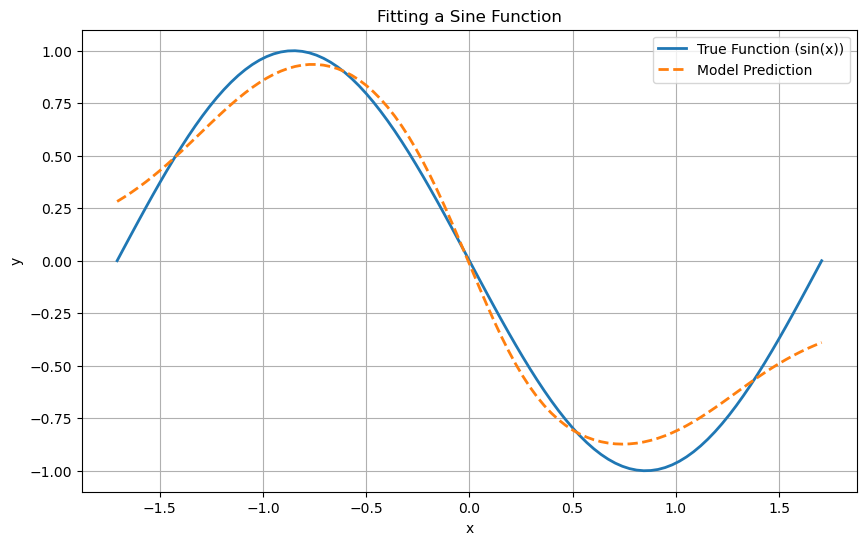

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# 数据生成
torch.manual_seed(42)
data_size = 100
X = torch.linspace(0, 2 * np.pi, data_size).unsqueeze(1)  # [0, 2π]
y = torch.sin(X)

# 数据标准化
X = (X - X.mean()) / X.std()

# 定义神经网络
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.tanh1 = nn.Tanh()
        self.fc2 = nn.Linear(10, 5)
        self.tanh2 = nn.Tanh()
        self.fc3 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh1(x)
        x = self.fc2(x)
        x = self.tanh2(x)
        x = self.fc3(x)
        return x

# 初始化模型、损失函数和优化器
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
epochs = 1000  # 减少训练次数
for epoch in range(epochs):
    model.train()
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()

    # 梯度裁剪
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# 验证并绘图
model.eval()
with torch.no_grad():
    predictions = model(X)

plt.figure(figsize=(10, 6))
plt.plot(X.numpy(), y.numpy(), label="True Function (sin(x))", linewidth=2)
plt.plot(X.numpy(), predictions.numpy(), label="Model Prediction", linestyle="dashed", linewidth=2)
plt.title("Fitting a Sine Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


In [6]:
'''
情况1 CSV中加载代码
'''

import pandas as pd
import torch

def load_csv_as_tensor(file_path):
    # 读取 CSV 文件到 Pandas DataFrame
    df = pd.read_csv(file_path)
    
    # 转换为 PyTorch 张量
    data_tensor = torch.tensor(df.values, dtype=torch.float32)
    
    # 数据归一化（标准化到 [0, 1]）
    normalized_tensor = (data_tensor - data_tensor.min(dim=0).values) / (data_tensor.max(dim=0).values - data_tensor.min(dim=0).values)
    
    return normalized_tensor

# 示例使用
file_path = "data.csv"
data = load_csv_as_tensor(file_path)
print(data)


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
'''
情况2 TXT文件中加载模板
'''

import torch
import numpy as np

def load_txt_as_tensor(file_path):
    # 从文本文件读取数据（假设以空格分隔）
    data = np.loadtxt(file_path)
    
    # 转换为 PyTorch 张量
    data_tensor = torch.tensor(data, dtype=torch.float32)
    
    # 数据标准化（零均值和单位标准差）
    mean = data_tensor.mean(dim=0, keepdim=True)
    std = data_tensor.std(dim=0, keepdim=True)
    standardized_tensor = (data_tensor - mean) / std
    
    return standardized_tensor

# 示例使用
file_path = "data.txt"
data = load_txt_as_tensor(file_path)
print(data)


In [ ]:
'''
情况3 Excel文件加载模板
'''

import pandas as pd
import torch

def load_excel_as_tensor(file_path, sheet_name):
    # 读取 Excel 文件的指定表到 Pandas DataFrame
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # 转换为 PyTorch 张量
    data_tensor = torch.tensor(df.values, dtype=torch.float32)
    
    # 数据归一化（标准化到 [0, 1]）
    normalized_tensor = (data_tensor - data_tensor.min(dim=0).values) / (data_tensor.max(dim=0).values - data_tensor.min(dim=0).values)
    
    return normalized_tensor

# 示例使用
file_path = "data.xlsx"
sheet_name = "Sheet1"
data = load_excel_as_tensor(file_path, sheet_name)
print(data)
